# Imports

In [141]:
import pandas as pd
import numpy as np
import collections
from matplotlib import pyplot as plt
import scipy.interpolate as interpolate
import math 

# data reading

In [92]:
df=pd.read_csv("PricingData.csv")
df

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt
0,"900.00,800.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28
1,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17
2,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02
3,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05
4,"876.00,800.00,767.00,729.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53
...,...,...,...,...,...
30644,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59
30645,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59
30646,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:08
30647,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:21


# Dropping the nans

In [117]:
# df1=df.iloc[:,[0,2,3,4]]
#dropping the service date as well
df1=df.iloc[:,[0,2,4]]
len1=len(df1.index)
dropping=[]
for i in range(0,len1):
  if str(df1.iloc[i,0]).lower()=="nan":
    dropping.append(i)
df1=df1.drop(index=dropping)
df1=df1.reindex(index=range(len(df1.index)))
df1=df1.dropna(axis=0)
len1=len(df1.index)
df1.loc[[15703,15704],:]
df1_save=df1.copy()
df1


,Seat Fare Type 1,Bus,RecordedAt
0,"900.00,800.00",d6fa79179fda2a77455794637f225962,11-07-2020 16:28
1,"910.00,833.00,795.00,762.00",d6fa79179fda2a77455794637f225962,11-07-2020 19:17
2,"910.00,833.00,795.00,762.00",d6fa79179fda2a77455794637f225962,12-07-2020 09:02
3,"910.00,833.00,795.00,762.00",d6fa79179fda2a77455794637f225962,12-07-2020 10:05
4,"876.00,800.00,767.00,729.00",d6fa79179fda2a77455794637f225962,13-07-2020 01:53
...,...,...,...
17659,600,6b4c5b251baf9846a4c4273693154363,23-07-2020 18:55
17660,600,6b4c5b251baf9846a4c4273693154363,23-07-2020 18:59
17661,600,6b4c5b251baf9846a4c4273693154363,23-07-2020 19:01
17662,600,6b4c5b251baf9846a4c4273693154363,23-07-2020 19:08


# Sorting the data and making the (x,y) pairs

In [134]:
df1=df1_save.copy()
for i in range(0,len(df1.index)):
  string=str(df1.iloc[i,-1])
  string=string[0:10]
  df1.iloc[i,-1]=string[-4:]+"-"+string[3:5]+"-"+string[0:2]
df1=df1.sort_values(axis=0,by=["Bus","RecordedAt"])
for i in range(len1):
  listy=str(df1.iloc[i,0]).split(",")
  x=0
  for j in listy:
    x+=float(j)
  x/=len(listy)
  # if(len(listy)>1):
  #   print(listy)
  df1.iloc[i,0]=x
#mapping time
mappa=dict()
for i in range(len1):
  if mappa.get(df1.iloc[i,1])==None:
    mappa[df1.iloc[i,1]]={df1.iloc[i,2]:[df1.iloc[i,0]]}#possible error here
  else:
    if mappa[df1.iloc[i,1]].get(df1.iloc[i,2])==None:
      mappa[df1.iloc[i,1]].update({df1.iloc[i,2]:[df1.iloc[i,0]]})
    else:
      mappa[df1.iloc[i,1]][df1.iloc[i,2]].append(df1.iloc[i,0])

df1

,Seat Fare Type 1,Bus,RecordedAt
6761,729.0,1010397688bce9bb80e59ceb984d3477,2020-06-18
9310,729.0,1010397688bce9bb80e59ceb984d3477,2020-06-20
11201,729.0,1010397688bce9bb80e59ceb984d3477,2020-06-21
1826,729.0,1010397688bce9bb80e59ceb984d3477,2020-06-22
13288,729.0,1010397688bce9bb80e59ceb984d3477,2020-06-22
...,...,...,...
15704,600.0,fd6cb8a34210b39ef547b94741ffa83b,2020-07-23
15705,600.0,fd6cb8a34210b39ef547b94741ffa83b,2020-07-23
15706,600.0,fd6cb8a34210b39ef547b94741ffa83b,2020-07-23
15707,600.0,fd6cb8a34210b39ef547b94741ffa83b,2020-07-23


In [163]:
def converter(string):
  string=str(string)
  # print(string)
  year=int(string[0:4])
  month=int(string[5:7])
  day=int(string[8:10])
  x=0
  if month==6:
    x+=31
  if month==7:
    x+=30
  x+=day
  return x

def give_mean(x):
  x=np.array(x)
  return x.mean()

# POLYNOMIAL INTERPOLATION

In [229]:
class poly:
  def __init__(self,x,y):
    self.x=x.copy()
    self.y=y.copy()
  def give_coeff(self):
    deltas=[]
    length=len(self.x)
    #skip the 0th one
    for i in range(length):
      deltas.append([])
    for i in range(length):
      deltas[0].append(self.y[i])

    for i in range(1,length):
      for j in range(0,length-i):
        deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
        # print(deltas[i-1][j+1],deltas[i-1][j],x[j+i],x[j])
    # print(deltas)
    ans=[]
    for i in range(0,length):
      ans.append(deltas[i][0])
    # ans.reverse()
    return ans
  def give_polynomial(self,X):
    coeff=self.give_coeff()
    multiplicand=1
    ans=0
    for i in range(0,len(coeff)):
      ans+=coeff[i]*multiplicand
      multiplicand*=(X-self.x[i])
    return ans

# Plotting

[729.         729.         729.         729.         729.
 999.         899.         729.         729.         875.66666667
 999.         999.         999.         999.         909.
 819.44871795 729.         658.33333333 636.84210526 681.6
 658.2962963  634.93939394 631.        ]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 0 1010397688bce9bb80e59ceb984d3477


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


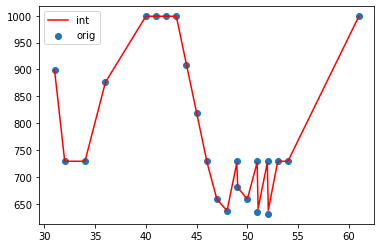

C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


[779.         779.         779.         939.5        907.4
 886.         886.         886.         886.         886.
 779.         886.         859.25       769.75       712.33333333
 676.72727273 676.15625    693.59375    831.91489362]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 1 10598f3c00cb10feb6c5a369ea5d4331


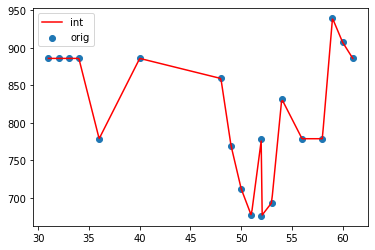

[469.11764706 478.10457516]
[469.11764705882354, 478.1045751633987]
drawing for 2 204490717c824958fef2ea80cc19442b


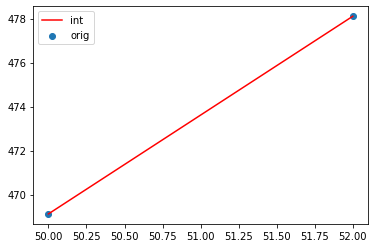

[1011.75490196  949.55172414  761.80416667  786.65686275  849.74358974
  761.33918129  749.7688172   750.32026144]
[1011.7549019607843, 949.551724137931, 761.8041666666666, 786.656862745098, 849.7435897435898, 761.33918128655, 749.7688172043013, 750.3202614379062]
drawing for 3 22f694bbcef788c5f2f4d44ad39fcdbd


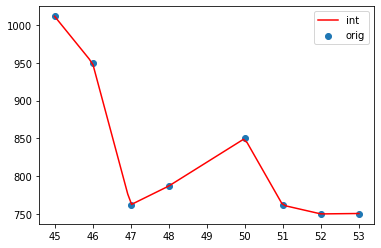

[1000.          914.94        825.          825.          800.
  850.          811.84210526  799.01960784]
[1000.0, 914.94, 825.0, 825.0, 800.0, 850.0, 811.8421052631578, 799.0196078431381]
drawing for 4 28af5b39ca85472e76714235b77a08c6


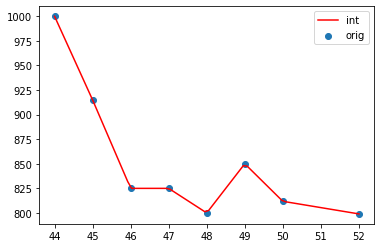

[798.57142857 787.5       ]
[798.5714285714286, 787.5]
drawing for 5 28fd7bdc6b80666877c3e9dd41e0ae5a


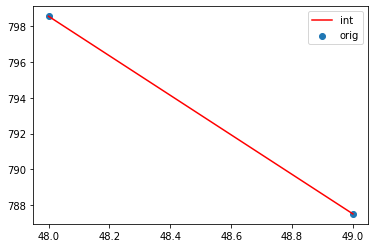

[786.66666667 786.66666667 786.66666667 786.66666667 870.55555556
 890.13888889 899.91666667 786.66666667 960.22727273 916.16666667
 928.12820513 874.28030303 806.         790.88235294 842.39583333
 837.         777.60416667 776.12612613 783.92857143]
[786.6666666666666, 786.6666666666666, 786.6666666666666, 786.6666666666666, 870.5555555555555, 890.1388888888887, 899.9166666666667, 786.6666666666665, 960.2272727272714, 916.1666666666642, 928.1282051281905, 874.2803030302894, 805.9999999999127, 1343707.6055522969, -957479.4545438949, 13537557.8880623, -203198.9906824916, 14618189.019820143, -33306751.69929288]
drawing for 6 3014ebaddbddfbfc27bf6d8958851aa5


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


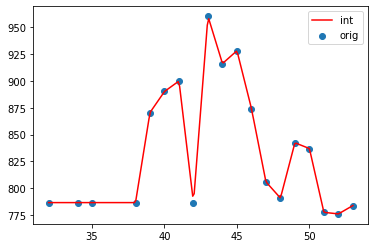

[ 800.          900.          800.          800.          855.55555556
  800.          833.33333333  966.66666667  844.44444444  838.88888889
 1229.41176471  924.34210526  821.61016949  912.12121212  843.85964912
 1153.84615385  810.57692308  800.          792.85714286  758.92857143]
[800.0, 900.0, 800.0, 799.9999999999998, 855.5555555555554, 800.0, 833.3333333333334, 966.6666666666665, 844.4444444444443, 838.8888888888894, 1229.411764705886, 924.3421052631697, 821.610169491566, 178604.81872896757, 63912.666969871396, 355571.22610369755, -370314.04859449534, -161865.95130723508, 146528.94930250582, -677241.5023942365]
drawing for 7 3b9b3497d23b8212272f1b4c1f70bbfa


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


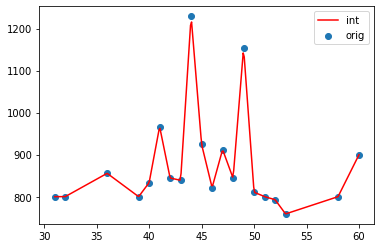

[791.5        791.5        791.5        791.5        791.5
 791.5        791.5        791.5        791.5        791.5
 756.38888889 668.33333333 605.65       791.5        699.41666667
 663.42307692 719.38095238 609.        ]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 8 3f16e520e1e84f8b9a72b63cbc4fb598


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


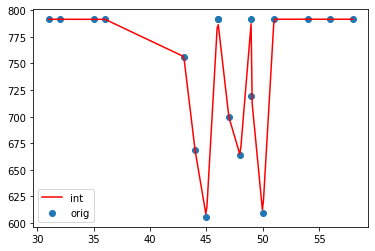

[ 899.          711.5         635.          635.          635.
  617.33333333  621.          621.          621.          722.5
  646.375       621.          846.         1321.          824.
  821.          621.          614.5         674.5         574.5
  821.          821.          821.          574.5         792.14705882
  774.5         634.5         580.69907407  511.77083333  574.5
  674.5         598.5         574.5         560.70689655]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 9 49a138fe484117e03704bcd345a83d32


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


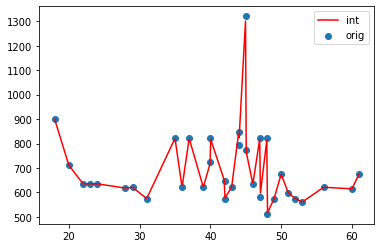

[ 999.          999.          999.          857.8         707.11111111
  713.19010417  674.05555556  568.08333333  646.         1258.34397163
  556.66979167  882.87142857]
[999.0, 999.0, 999.0, 857.8, 707.111111111111, 713.1901041666666, 674.0555555555555, 568.0833333333337, 646.0000000000018, 1258.3439716312055, 556.6697916667181, 882.8714285716851]
drawing for 10 4a2864d951d93bbfb4d7ac6a4eb40a75


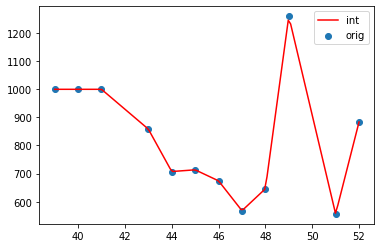

[1099.          822.          694.53571429  649.          670.30612245
 1133.67741935  649.          627.78787879  649.          649.        ]
[1099.0, 822.0, 694.5357142857143, 649.0, 670.3061224489796, 1133.6774193548388, 649.0, 627.7878787878744, 648.9999999999818, 648.9999999999709]
drawing for 11 52f186799d2b458345f56fec0c00c689


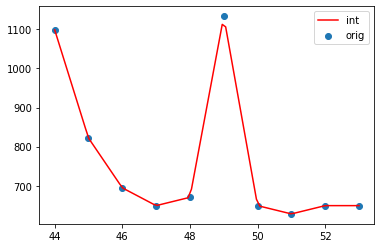

[1330.         1257.47333333  805.84477124  841.79        809.24242424
  756.33743169  753.38405797  757.69379845  751.97674419  790.9248366 ]
[1330.0, 1257.4733333333334, 805.84477124183, 841.79, 809.2424242424242, 756.3374316939896, 753.3840579710154, 757.6937984496129, 751.976744186052, 790.9248366013136]
drawing for 12 5580f995d6f4d3bcceca7e2db6c77bf7


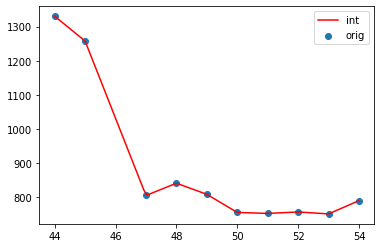

[1013.33333333  820.          820.          820.          820.
 1099.          987.4         959.5         820.         1099.
 1099.        ]
[1013.3333333333334, 820.0, 820.0, 820.0, 820.0, 1098.9999999999998, 987.3999999999999, 959.4999999999991, 820.0, 1099.000000000029, 1098.9999999995343]
drawing for 13 56f71d6aca7fc3a5db009a462d9e502a


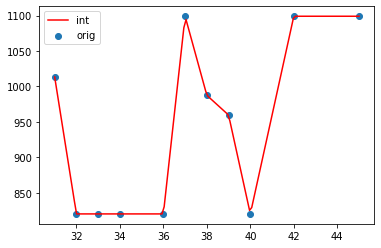

[ 810.          810.          810.          810.          810.
  810.         1060.         1260.         1110.          922.5
  910.          910.          910.          746.36363636  760.
  866.25        810.          770.15625     770.81081081  738.26086957
  727.85714286]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 14 5efeca02cbcf91c6230fd894cfae0b1f


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


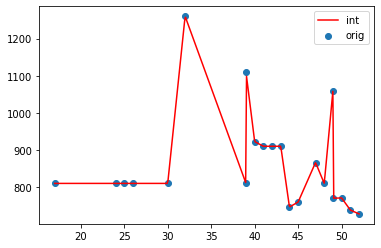

[743.72222222 817.5        827.1875     714.19753086 684.67372881
 700.66666667 668.37719298 667.05882353]
[743.7222222222222, 817.5, 827.1875, 714.1975308641975, 684.6737288135593, 700.6666666666665, 668.3771929824561, 667.058823529412]
drawing for 15 626d457856a4635087133cf957abae2b


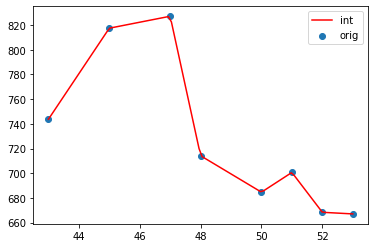

[729.         729.         749.3        637.57407407 606.875
 704.75       704.75       699.75       662.48214286 632.97849462
 622.5       ]
[729.0, 729.0, 749.3, 637.574074074074, 606.875, 704.7499999999999, 704.7499999999997, 699.7499999999997, 662.4821428571424, 632.9784946236582, 622.5000000000027]
drawing for 16 642c372f4c10a6c0039912b557aa8a22


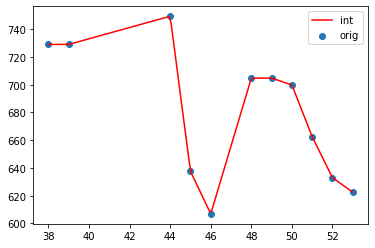

[724.         724.         724.         649.28571429 654.48780488
 606.60869565 724.         724.         724.         724.
 676.52380952 624.5       ]
[724.0, 724.0, 724.0, 649.2857142857143, 654.4878048780488, 606.608695652174, 724.0, 724.0000000000007, 723.9999999999977, 723.9999999999945, 676.523809523791, 624.4999999999345]
drawing for 17 64a22e07e0139a1d1f322f58f206e5bf


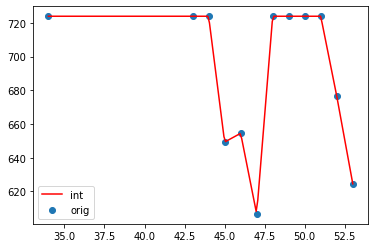

[ 833.          625.          625.         1249.          625.
  625.          607.5         625.          811.5         672.72727273
  625.          602.27272727]
[833.0, 625.0, 625.0, 1249.0, 625.0000000000018, 625.0000000000007, 607.4999999999995, 625.0, 811.499999999999, 672.727272727275, 625.0000000000043, 602.2727272727341]
drawing for 18 6b4c5b251baf9846a4c4273693154363


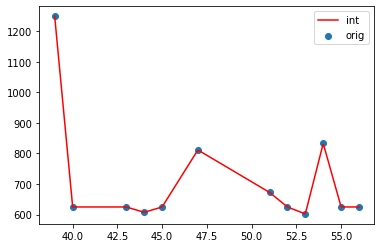

[690.         840.         690.         920.         862.85714286
 990.         638.75       690.         597.05882353 690.
 679.47368421 610.58823529]
[690.0, 840.0, 690.0, 920.0, 862.8571428571429, 989.9999999999998, 638.7499999999993, 689.9999999999927, 597.0588235293999, 689.9999999999818, 679.4736842104794, 610.5882352939952]
drawing for 19 6d364920e6c9f9f71b1d881107e639f0


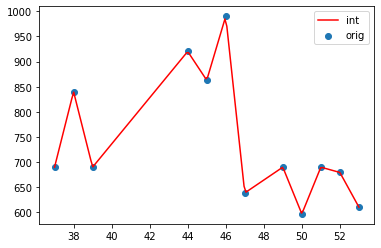

[1400.         1400.         1179.5        1112.98484848  949.5
  894.83333333  873.35714286  864.76190476  867.5       ]
[1400.0, 1400.0, 1179.5, 1112.9848484848485, 949.5, 894.8333333333339, 873.3571428571432, 864.7619047619069, 867.5000000000024]
drawing for 20 6ebe14c775a983e43b07c55e6b71d77d


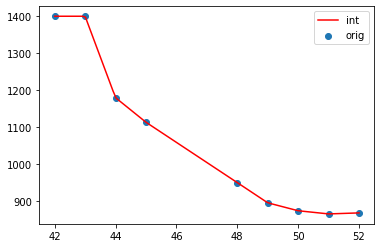

[ 810.         1055.         1010.         1150.         1150.
 1100.          813.0952381   613.75        810.          810.
  810.          636.19047619  698.94736842  810.        ]
[810.0, 1055.0, 1009.9999999999999, 1150.0, 1150.0, 1100.0000000000005, 813.0952380952388, 613.7499999999995, 809.9999999999986, 809.9999999999955, 810.0, 636.1904761904798, -40421.82829841132, 117623.27338742299]
drawing for 21 74017231b804c80d3f1fa28be2fe0ffa


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


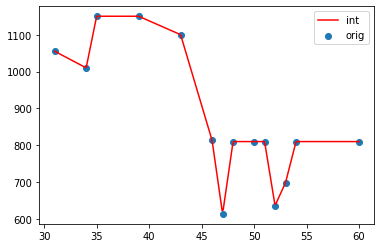

C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


[ 875.          875.          875.          875.          925.
 1042.64705882  971.2962963   948.21428571  895.          875.
  875.          875.          875.          826.28205128  788.125
  822.61904762]
[875.0, 875.0, 875.0, 875.0, 925.0, 1042.6470588235297, 971.2962962962961, 948.2142857142856, 894.9999999999999, 874.9999999999995, 875.0000000000005, 875.0000000000009, 874.9999999999727, 619363.3627897301, -2224775.7567875395, -1083707.3268381394]
drawing for 22 78690969ed345320991aba0cd59e0733


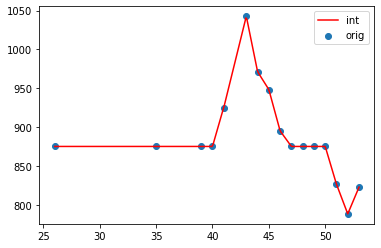

[ 783.          783.          783.          783.          699.6
 1249.          774.5         774.5         961.75        674.5
 1249.         1249.          953.92857143  741.16666667  901.
  785.04166667  775.76190476  692.86111111  669.328125    800.        ]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 23 7f431e064b9ea2f9852a37f92b316802


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


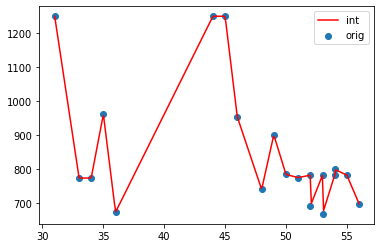

C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


[845.         845.         845.         845.         845.
 845.         852.14285714 920.83568075 892.14285714 809.94252874
 845.         845.         799.8245614  845.         775.
 838.91891892 854.80392157]
[845.0, 845.0, 845.0, 845.0, 845.0, 845.0, 852.1428571428571, 920.8356807511736, 892.1428571428572, 809.9425287356324, 844.9999999999998, 845.0000000000005, 799.8245614035213, 245336.93428145399, -889217.6723517731, -9574.065004007784, -1239995.9520292047]
drawing for 24 8239a4d7ab3b3de7711c6cb7748229bf


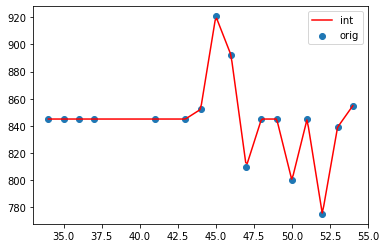

[898.68421053 824.4047619  710.6        694.87179487 687.14285714]
[898.6842105263158, 824.4047619047619, 710.6, 694.8717948717949, 687.1428571428571]
drawing for 25 8a96c2026a520cfd595767af6e5974ef


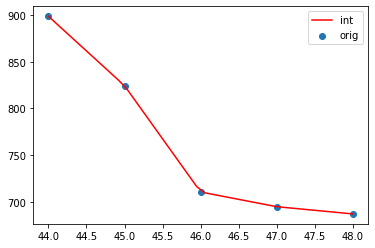

[692.81699346 669.77124183 658.61928105 771.57908497]
[692.8169934640524, 669.7712418300653, 658.6192810457516, 771.5790849673202]
drawing for 26 909d337c7f74b91e3b19e5f43689b477


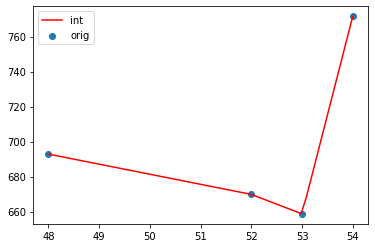

[850.         925.         775.         925.         850.
 858.33333333 975.         975.         850.         916.66666667
 855.55555556 828.7037037  726.92307692 798.21428571 766.66666667
 794.         746.42857143 775.         775.        ]
[850.0, 925.0, 775.0, 925.0, 850.0, 858.3333333333333, 975.0, 974.9999999999995, 850.0000000000005, 916.6666666666674, 855.5555555555616, 828.7037037037132, -26484.731847368053, -22967.348618192787, 194457.30510423676, 86121.31398918081, 268304.473232046, 180466.69889057497, 367330.4746018607]
drawing for 27 94e6adf5189531e3a52686bb17c2b2ad


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


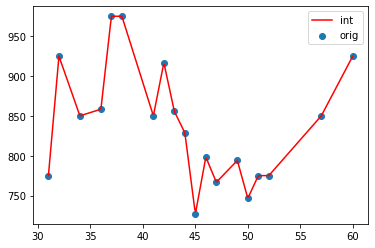

[863.         726.21621622 725.         725.         768.66666667
 781.         819.8        809.         837.         725.
 825.        ]
[863.0, 726.2162162162163, 725.0, 725.0, 768.6666666666666, 781.0000000000001, 819.8000000000002, 809.0000000000008, 837.0000000000014, 725.0000000000059, 825.0000000000091]
drawing for 28 9656d6395d1f3a4497d0871a03366078


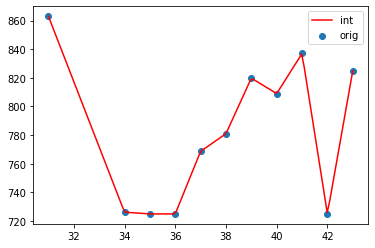

[600.]
[600.0]
drawing for 29 97c2a3d5ad4a079ef3e9c3d88e21ebb1
insufficient data for 97c2a3d5ad4a079ef3e9c3d88e21ebb1
[925.         925.         875.         767.61363636]
[925.0, 925.0, 875.0, 767.6136363636364]
drawing for 30 9d2a5d655e5000921f3591f6cd7908d3


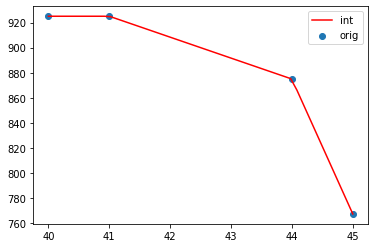

[885.         885.         885.         885.         885.
 885.         783.84615385 745.        ]
[885.0, 885.0, 885.0, 885.0, 885.0, 885.0, 783.8461538461538, 745.0]
drawing for 31 a0243f8c4129f3a468ede17e832a7a9a


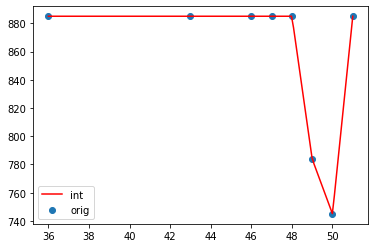

[873.14705882 791.26797386 669.64705882 661.54575163 715.26143791]
[873.1470588235294, 791.2679738562092, 669.6470588235294, 661.5457516339868, 715.2614379084966]
drawing for 32 a6951a59b64579edcf822ab9ea4c0c83


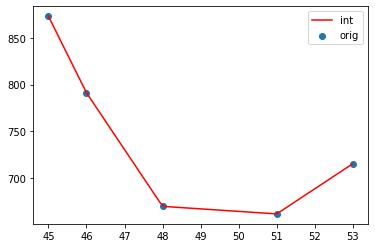

[763.7254902  850.         744.25925926 719.48979592 711.76470588
 704.90196078]
[763.7254901960785, 850.0, 744.2592592592592, 719.4897959183673, 711.7647058823532, 704.9019607843138]
drawing for 33 a70bfd3145f3c601b7b8371845be6e57


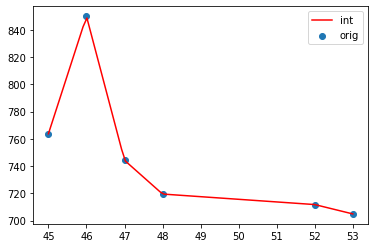

[864.         864.         864.         864.         864.
 864.         864.         864.         864.         851.05555556
 846.94285714 786.91666667 841.04347826 824.16666667 795.
 795.         789.04761905 774.62962963 795.         795.        ]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 34 a85170e65d1c03e1ea78595c0d8deb80


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


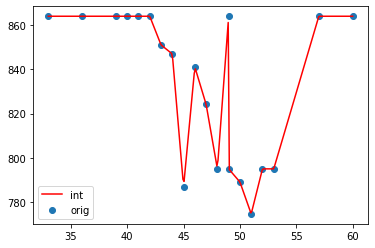

[ 683.18452381  600.          529.31034483 1250.73529412  575.
  463.8974359 ]
[683.1845238095239, 600.0, 529.3103448275862, 1250.735294117647, 575.0000000000005, 463.89743589743375]
drawing for 35 b74673eaf82c5158c4f76797c938c9a0


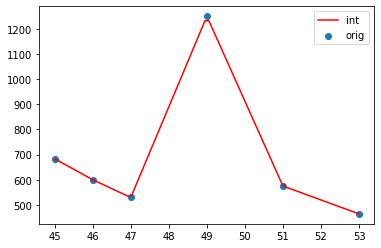

[920.         920.         799.         949.         899.
 899.         880.73076923 818.64285714 799.92592593 746.91666667
 723.4047619  806.14285714 663.75757576 764.38461538 714.17857143
 621.88095238 732.08823529]
[920.0, 920.0, 799.0, 949.0000000000002, 898.9999999999999, 899.0000000000005, 880.7307692307696, 818.6428571428578, 799.9259259259271, 746.9166666666681, 723.4047619047619, 806.1428571428614, 663.7575757575742, -125014.9064265824, 254889.70559202108, -155969.97428228013, 95483.64008754354]
drawing for 36 b8d1710db82f66126ca3f540f2ad2f08


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


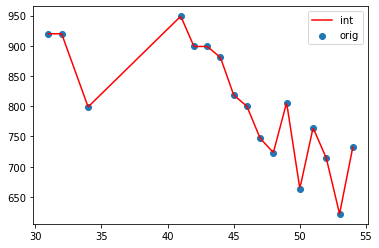

[1326.33333333  975.22807018  778.88888889  699.28571429]
[1326.3333333333333, 975.2280701754386, 778.8888888888885, 699.2857142857144]
drawing for 37 bae2b9f85a7c3e8eaea1a12ac8be7af2


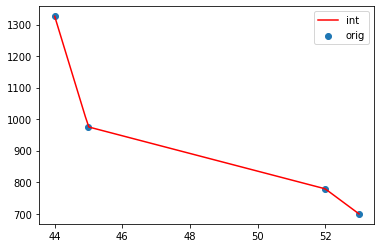

[1175.          960.71428571  800.          995.45454545  800.
  800.          850.          780.          737.96296296  800.        ]
[1175.0, 960.7142857142857, 800.0, 995.4545454545455, 799.9999999999999, 799.9999999999995, 850.0, 780.0, 737.9629629629635, 799.9999999998181]
drawing for 38 bb34a6d5a6c5e806c2bdc7afc63e4397


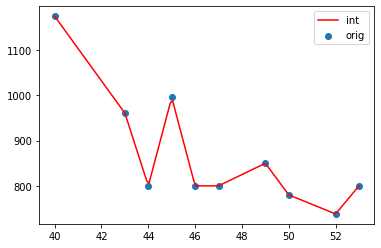

[525.         502.77777778 526.47058824 490.44117647]
[525.0, 502.77777777777777, 526.4705882352941, 490.44117647058823]
drawing for 39 bbe32cc22507520cba3b9e56765482c5


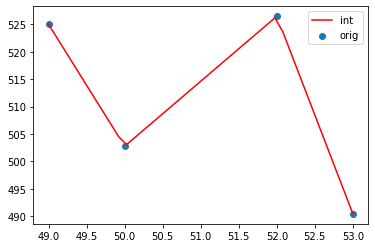

[772.69230769 630.         596.62962963 531.39534884 517.2327044
 557.23684211 531.85897436 544.18300654]
[772.6923076923077, 630.0, 596.6296296296296, 531.3953488372093, 517.2327044025157, 557.2368421052629, 531.8589743589737, 544.1830065359459]
drawing for 40 c0e0a47587fbf6247f4f9a22ba22cc80


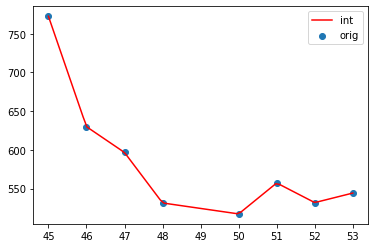

[ 925.         1062.5         918.42105263  825.          752.27272727
  621.71052632]
[925.0, 1062.5, 918.421052631579, 825.0, 752.2727272727269, 621.7105263157896]
drawing for 41 c3001e2a3fcf58a3f9881a6635d8765a


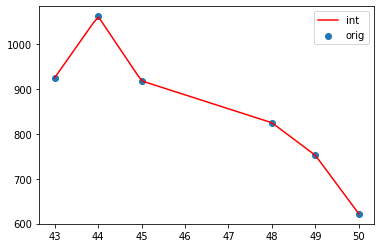

[810.         810.         829.5        829.5        810.
 810.         810.         810.         829.5        829.5
 646.66666667 646.66666667 646.66666667 646.66666667 946.66666667
 946.66666667 646.66666667 946.66666667 647.72727273 581.25
 600.         600.         600.         584.16666667 646.66666667
 625.         625.         608.92857143]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 42 ca5a5dcf590a304de20107f2f119fe4d


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


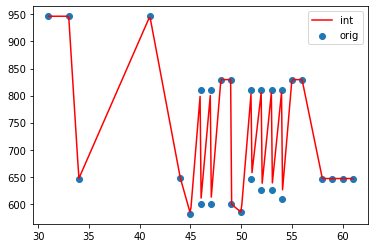

[810.    810.    810.    810.    646.875 600.   ]
[810.0, 810.0, 810.0, 810.0, 646.875, 600.0]
drawing for 43 cd74100306b5b70cc61c264e9201c32c


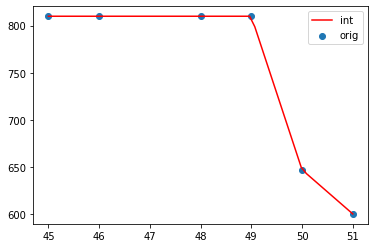

[976.25       884.5        837.5        825.         793.
 710.1372549  705.75877193 689.37777778 708.25       830.83560606
 836.62439024 649.55614035 694.4        652.16029412 640.20708333
 632.30555556]
[976.25, 884.5, 837.5, 825.0, 793.0, 710.1372549019608, 705.7587719298247, 689.3777777777779, 708.2500000000002, 830.8356060606084, 836.6243902439132, 649.5561403509018, 694.4000000000433, -1121107.922878796, -1738570.2015240057, 3108164.150111904]
drawing for 44 d6fa79179fda2a77455794637f225962


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:30: RuntimeWarning: overflow encountered in long_scalars
  multiplicand*=(X-self.x[i])


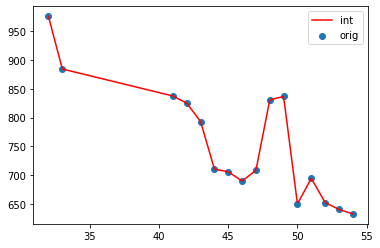

[775.         775.         696.81372549 560.        ]
[775.0, 775.0, 696.813725490196, 560.0]
drawing for 45 dcb5420e873f5bb322abf4cece991b03


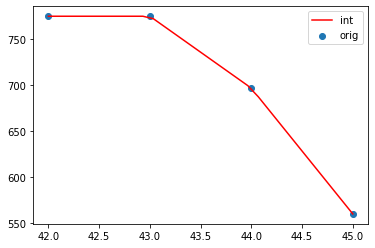

[949.5        949.5        949.5        949.5        881.30769231]
[949.5, 949.5, 949.5, 949.5, 881.3076923076923]
drawing for 46 f4b9954bf711461b37cab613fdcb8807


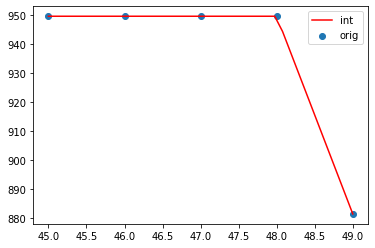

[810.         810.         990.         810.         990.
 810.         945.         825.33333333 743.         810.
 690.         622.27272727]
[810.0, 810.0, 990.0, 810.0, 989.9999999999999, 809.9999999999995, 944.9999999999975, 825.3333333333309, 742.9999999999967, 809.9999999999952, 689.9999999999953, 622.2727272727225]
drawing for 47 f663c68449dda5634f3797fd9c4c3ad6


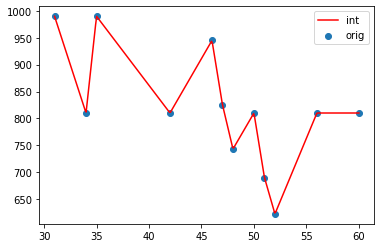

[600. 600. 600.]
[600.0, 600.0, 600.0]
drawing for 48 fa311021504691f83fa777072f491f0b


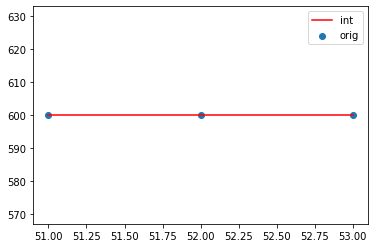

[940.         729.         729.         940.         729.
 625.         667.85714286 729.         729.         729.
 644.97435897 729.         688.01351351]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
drawing for 49 fd6cb8a34210b39ef547b94741ffa83b


C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:16: RuntimeWarning: invalid value encountered in double_scalars
  deltas[i].append((deltas[i-1][j+1]-deltas[i-1][j])/(self.x[j+i]-self.x[j]))
C:\Users\sayan\AppData\Local\Temp/ipykernel_35764/1158830066.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ans+=coeff[i]*multiplicand


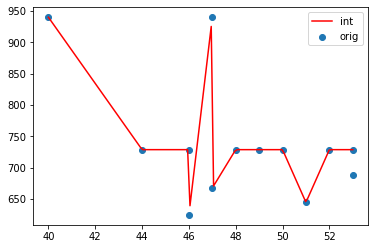

In [231]:
listy=[i for i in mappa]
all_poly=[]
index=0
for val in listy:
  # val=listy[0]
  x=np.array(list(map(converter,mappa[val].keys())))
  y=np.array(list(map(give_mean,mappa[val].values())))
  p=poly(x,y)
  temp_y=[p.give_polynomial(x[i]) for i in range(len(x))]
  print(y)
  print(temp_y)
  all_poly.append(poly(x,y))
  # print(x)
  # print(y)
  print("drawing for {} {}".format(index,val))
  index+=1
  if(len(x)<2):
    print("insufficient data for {}".format(val))
    continue

  func=interpolate.interp1d(x,y,kind="linear")
  scale=np.linspace(x.min(),x.max(),(x.max()-x.min())*10)
  interpolated_func=func(scale)
  plt.scatter(x,y)
  plt.plot(scale,interpolated_func,'red')
  plt.legend(['int','orig'])
  plt.show()


# Derivative

In [184]:
import math
def deriv(x,listy):
  h=1e-6
  deg=len(listy)-1
  f_x=0
  f_xh=0
  for i in range(len(listy)):
    f_x+=math.pow(x,deg-i)*listy[i]
    f_xh+=math.pow(x+h,deg-i)*listy[i]
  return (f_xh-f_x)/h
  
l=[2,3,5]
print(deriv(1,l))

7.0000020002680685


In [228]:
x1=[-0.5,0,0.36]
y1=[2.75,3,3.49]
p=poly(x1,y1)
# x1=[1,2,3]
# y1=[7,9,11]
print(p.give_polynomial(0))

3 2.75 0 -0.5
3.49 3 0.36 0
1.3611111111111118 0.5 0.36 -0.5
[[2.75, 3, 3.49], [0.5, 1.3611111111111118], [1.0012919896640835]]
3.0
